# Projet : Conversion Rate Challenge 🥇🥈🥉
## Analyse exploratoire des données - EDA

Avant de se lancer dans la construction d'un modèle, analysons les données misent à notre disposition.

### Import des modules

In [2]:
import pandas as pd

from summarytools import dfSummary

import seaborn as sns
import matplotlib.pyplot as plt

### Chargement des données

In [3]:
conversion_df = pd.read_csv('./data/conversion_data_train.csv')
conversion_df.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


In [3]:
dfSummary(conversion_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,country[object],1. US2. China3. UK4. Germany,"160,124 (56.3%)69,122 (24.3%)43,641 (15.3%)11,693 (4.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAfFJREFUeJzt20Fq21AYhdFfxYRmImEMXowX0cV2EdqNMdagCZmogxAwNMlIunqo56zgYT5kntDt5nkuSPix9QH4f4iNmK6qnqvqaeuD7NTbPM8vWx+iFYfT6fSr7/vj1gfZo2mabl3X/Rbcu0Pf98fL5fIyDMPr1ofZk/v9/nMcx+P1en2qKrFV1aGqahiG1/P5/Gfrw+zQ89YHaIkLAjFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERc6h6/xxm64Psjd/0X4dpmm7jOB7L5zCLm6bpVlVvW5+jFT4LX5fPwh90pnykuCAQ0/LfqL+gnWl2XWWZtD9Nrqssk/ap5XWVVzE744JAjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjZgmp3ytnYdlNDvlM4PbHxsEYkz5iEk82TyhqKrAuspKig+rrquspHiUWFc1dctlO17qEiM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNm1XWVlRSPVl9XWUnxwQaBGOsqYr57snkisagv11VWUSzt03WVVRRr+G5dZRXForzUJUZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEbMp+sqqyjW8OW6yiqKpdkgEGNdRYwLAjF/AbNY2LmAHpcBAAAAAElFTkSuQmCC"">",0(0.0%)
2,age[int64],Mean (sd) : 30.6 (8.3)min < med < max:17.0 < 30.0 < 123.0IQR (CV) : 12.0 (3.7),60 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAjFJREFUeJzt3UGOokAYhuG/BjWoCcSY6M4LTNILlx5iDjtH6IUn8AbuTAzBSDcjIr3q1WS6hZJuPuZ99oUs3gB/YqVcVVUGdN2P774B4B6DNi/unBub2cjjEpeqql4fdT/Q1VqozrnxfD7/FUXRrOk1TqdT4pz7Taxo84k6iqJottlsXuM4zusuTtM03G63s+PxODIzQv3PtfrqNzOL4zhfLBYvDZePH3ozkMUwBQmECgmfvvo9JvfodrsNG6wD/vJhqD6Te1EUYVmWP/M8fzazpt+ogJl9/kRtPLnv9/vZbrebXK/XwOP+ADO7c+pvMrknScLEjodhmIIEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoWE1g9E81GW5dDMIudck+Wco9ojnQ01y7JhURRPq9UqCIKg9hGVnKPaL50N9XK5DMIwnKzX63y5XCZ11nKOav90NtR30+m06VmqnMrSIwxTkECokECokECokECokECokECokECokECokECokECokECokECokECokECokND5/6M25bmNxYytLJ3Sy1B9t7GYsZWla3oZqs82FjO2snRRL0N957GNxYytLJ1yV6hpmoZ1L3w+n0MzsyzLwsPhMPnK9b6/naZpWJblwPy+cVHPn6qq/vmZ9gYhuLjYOnlgCQAAAABJRU5ErkJggg=="">",0(0.0%)
3,new_user[int64],1. 12. 0,"195,066 (68.5%)89,514 (31.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAT1JREFUeJzt20FqwzAURdGvYkIzkTAGLyaL6GK7CO3GGGvQhEzUQadtOjA8oa97VvAhN4EYv1BrNUAhmNnVzC6tD8G/nrXWe+sjzpiWZfmIMc6tD8FrpZQ9hPDZc3BTjHG+3W73lNKj9TH43XEc7znnedu2i5n1G5uZWUrpsa7rV+tj8NK19QFnvbU+AOMgNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBZjL7eTmv9SH4m5fPZyql7Dnn2Ry8nOdZKWU3s2frO85g8NKP7gcvgSkfVLz8snX/rR+Biymfh5nbCLqf8nmZuY3Ay5SPf9Id4KEuZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJDpfsrX8+2jcTHl8zBzGwGDF8h8Awpbat9GRbT/AAAAAElFTkSuQmCC"">",0(0.0%)
4,source[object],1. Seo2. Ads3. Direct,"139,477 (49.0%)80,027 (28.1%)65,076 (22.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAZhJREFUeJzt20Fq2wAURdGvYkIzkTAGL8aL6GK7CO3GGGvQhEzUQacd1Cl90nfPWcHHXGwk/IZ1XQsSvmx9AP+Poapeq+pl60Ma+VjX9W3rIzo6nE6nb+M4Hrc+pItlWW7DMHwX3OMO4zgeL5fL2zRN71sfs3f3+/3rPM/H6/X6UlVie9Chqmqapvfz+fxj62OaeN36gK48IBAjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIj5lD1639aWx/Sgc/p7xyWZbnN83ws/9P6I8uy3KrqY+s7OrJBeJwNwicNpnykdPxm883SVLt1lXVTX63WVdZNvXVcV3lqbspLXWLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEtFpXdbmT32u3rrJu6ssGgRjrKmI8IBCzt59RP5FPbFdTPjO957abKZ+Z3vPb25SvxesXPscDAjFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZidjPl28MN/Fu7mvKZ6T03GwRiTPmI+QlKvKNK4kuAvAAAAABJRU5ErkJggg=="">",0(0.0%)
5,total_pages_visited[int64],Mean (sd) : 4.9 (3.3)min < med < max:1.0 < 4.0 < 29.0IQR (CV) : 5.0 (1.5),29 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AA

### Constitution des données

284580 lignes sur 6 colonnes.
La notion de duplicates n'a pas de sens compte tenue du format de ce dataset: pas d'ID pas utilisateur, on doit donc considérer chaque ligne comme un utilisateur unique.
Pas de valeurs manquantes.

1 target:
- `converted`: true/false

5 features:
- `country`: variable catégorielle à 5 valeurs [US, China, UK, Germany]
- `age`: variable numérique
- `new_user`: variable catégorielle booléenne
- `source`: variable catégorielle à 3 valeurs [Seo, Ads, Direct]
- `total_pages_visited`: variable numérique



In [15]:
target_feature = "converted"
numerical_features = ["age", "total_pages_visited"]
categorical_features = ["country", "new_user", "source"]

### Data Visualization

#### Analyse univariée

In [5]:
dist = conversion_df["converted"].value_counts(normalize=True) * 100
for value, pct in dist.items():
    print(f"converted = {value}: {pct:.2f}%")

converted = 0: 96.77%
converted = 1: 3.23%


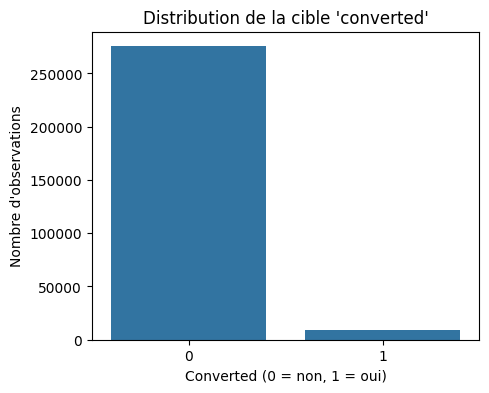

In [6]:
plt.figure(figsize=(5, 4))
sns.countplot(x='converted', data=conversion_df)
plt.title("Distribution de la cible 'converted'")
plt.xlabel("Converted (0 = non, 1 = oui)")
plt.ylabel("Nombre d'observations")
plt.show()

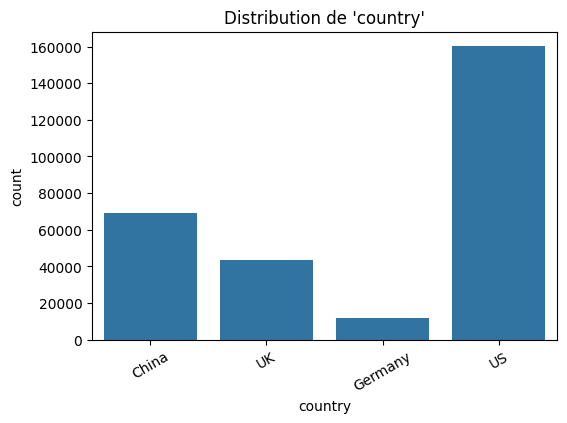

country = US: 56.27%
country = China: 24.29%
country = UK: 15.34%
country = Germany: 4.11%


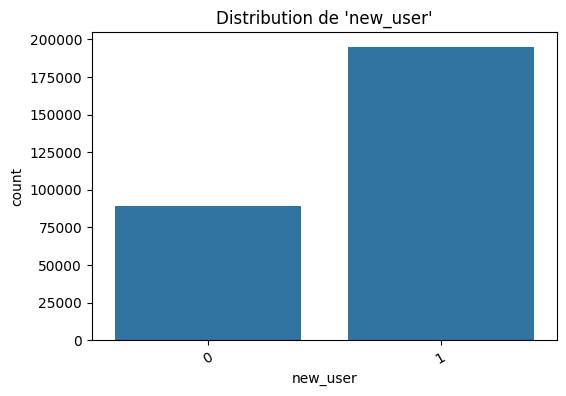

new_user = 1: 68.55%
new_user = 0: 31.45%


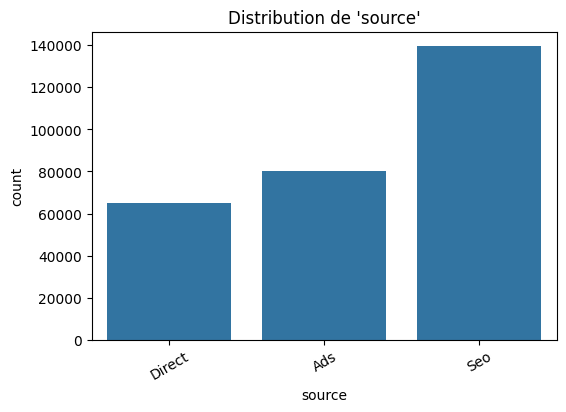

source = Seo: 49.01%
source = Ads: 28.12%
source = Direct: 22.87%


In [7]:
# categorical_vars = ['country', 'source', 'new_user']


for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, data=conversion_df)
    plt.title(f"Distribution de '{feature}'")
    plt.xticks(rotation=30)
    plt.show()
    
    dist = conversion_df[feature].value_counts(normalize=True) * 100
    for value, pct in dist.items():
        print(f"{feature} = {value}: {pct:.2f}%")
    

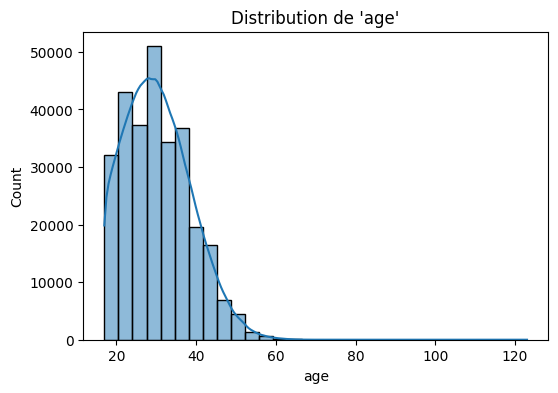

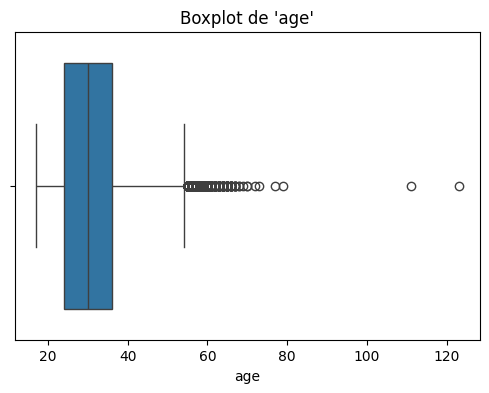

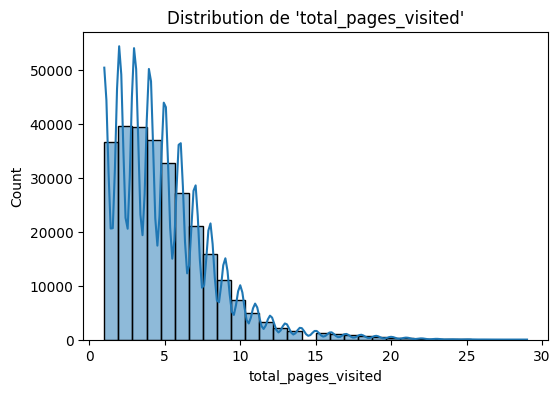

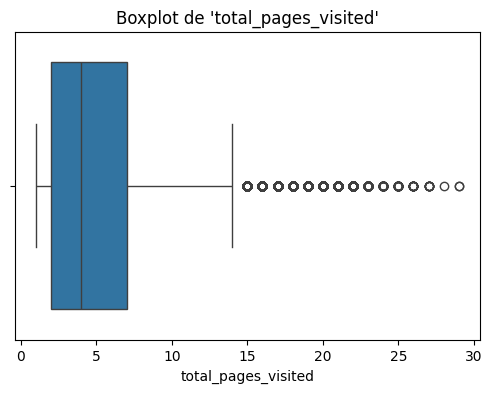

In [8]:
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(conversion_df[feature], kde=True, bins=30)
    plt.title(f"Distribution de '{feature}'")
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.boxplot(x=conversion_df[feature])
    plt.title(f"Boxplot de '{feature}'")
    plt.show()

#### Analyse bivariée

In [9]:
total_users = len(conversion_df)
total_converted = conversion_df['converted'].sum()

grouped = conversion_df.groupby('country').agg(
    nb_users = ('converted', 'count'),
    nb_converted = ('converted', 'sum')
).reset_index()

grouped['pct_users_total'] = 100 * grouped['nb_users'] / total_users
grouped['pct_converted_total'] = 100 * grouped['nb_converted'] / total_converted
grouped['taux_conversion'] = grouped['nb_converted'] / grouped['nb_users']

display(grouped)

,country,nb_users,nb_converted,pct_users_total,pct_converted_total,taux_conversion
0,China,69122,89,24.289128,0.969499,0.001288
1,Germany,11693,730,4.108862,7.952070,0.062431
2,UK,43641,2291,15.335231,24.956427,0.052497
3,US,160124,6070,56.266779,66.122004,0.037908


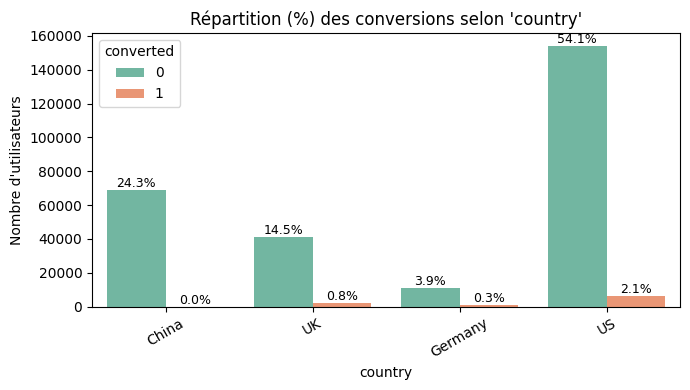

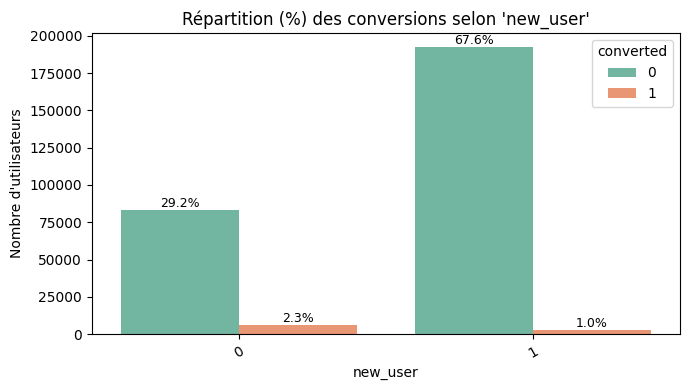

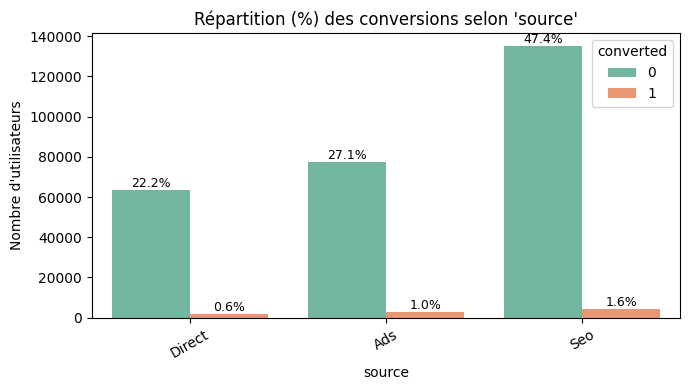

In [10]:
total_users = len(conversion_df) 

for feature in categorical_features:
    plt.figure(figsize=(7, 4))
    ax = sns.countplot(x=feature, hue='converted', data=conversion_df, palette="Set2")

    # Ajout du pourcentage global sur chaque barre
    for p in ax.patches:
        height = p.get_height()

        if height > 0:  # ✅ afficher uniquement les barres visibles
            percent = 100 * height / total_users
            ax.annotate(f'{percent:.1f}%', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='bottom', fontsize=9, color='black')

    plt.title(f"Répartition (%) des conversions selon '{feature}'")
    plt.ylabel("Nombre d'utilisateurs")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


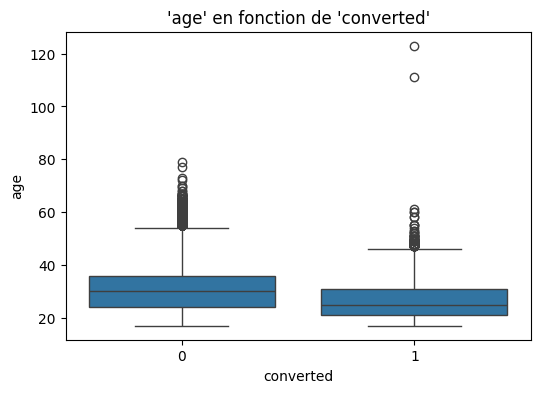

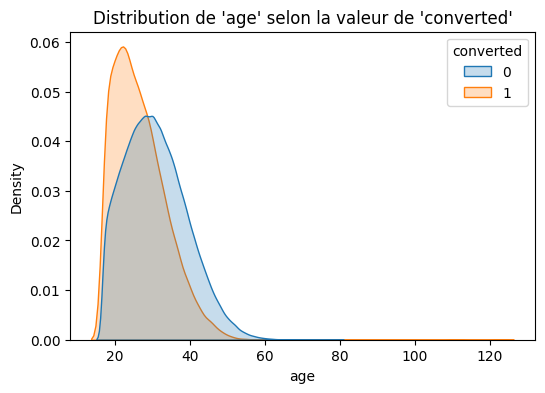

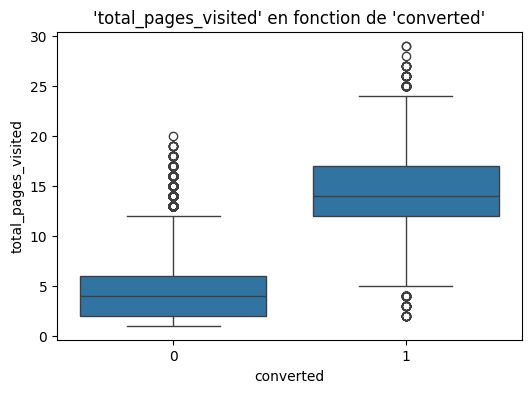

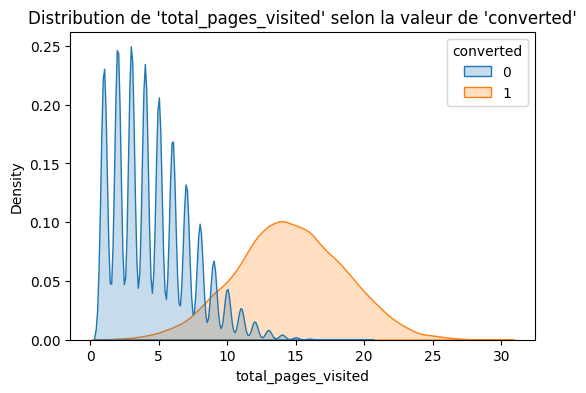

In [11]:
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='converted', y=feature, data=conversion_df)
    plt.title(f"'{feature}' en fonction de 'converted'")
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=conversion_df, x=feature, hue='converted', fill=True, common_norm=False)
    plt.title(f"Distribution de '{feature}' selon la valeur de 'converted'")
    plt.show()

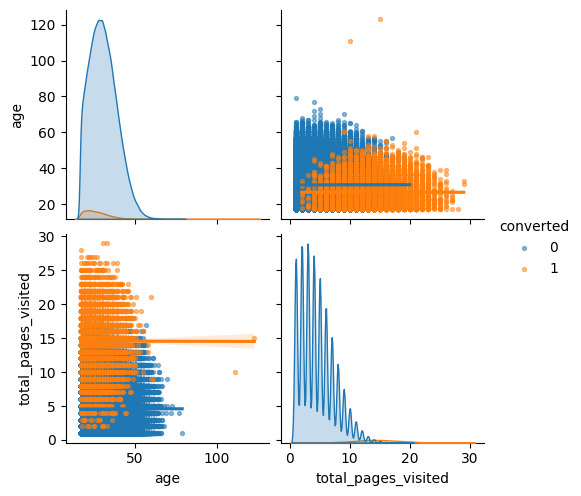

In [16]:
sns.pairplot(conversion_df[numerical_features + [target_feature]], 
             hue="converted", 
             kind='reg', 
             plot_kws={'scatter_kws': {'alpha': 0.5, 's':8}})

#### Corrélation

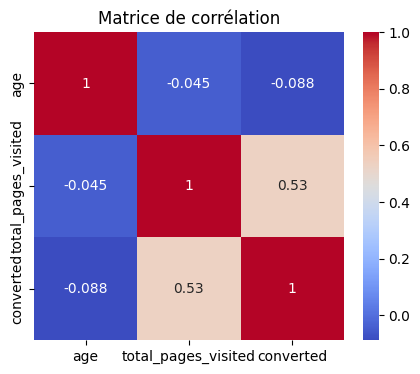

In [12]:
plt.figure(figsize=(5, 4))
sns.heatmap(conversion_df[["age", "total_pages_visited", 'converted']].corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

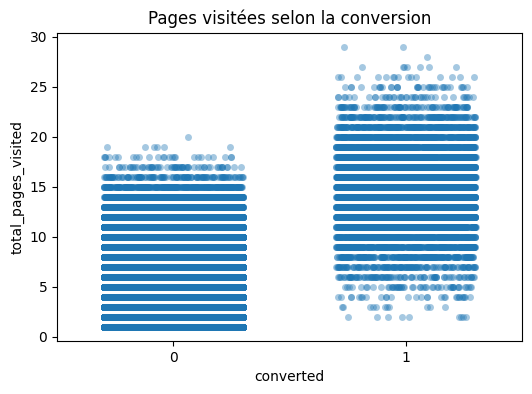

In [13]:
plt.figure(figsize=(6, 4))
sns.stripplot(data=conversion_df, x="converted", y="total_pages_visited", jitter=0.3, alpha=0.4)
plt.title("Pages visitées selon la conversion")
plt.show()

### Synthèse

Dataset trés déséquilibré! Presque 97% de not_converted.

L'âge a quelques extrêmes (123 ans!) => outliers removal à prévoir.

Deux pays majoritairement représentés: US (56.27%), China (24.29%)

Mais quasiment pas de conversion en Chine!

💡 => le contenu est-il adapté à la chine ? Faut-il approfondir la connaissance de ce marché ?

La majorité des utilisateurs est poussée par le SEO.

En moyenne peu de pages visitées, mais on observe une corrélation entre nombre de pages visitées et taux de conversion.

💡 => il faut réussir à capter les utilisateurs plus longtemps (meilleure adaptation du contenu selon le profil ? meilleure UX/navigation plus engageante).